## Primordial Black Holes (in Dark Matter clothing)

See the associated notes for more details.

*NB:* All distances in pc. For reference, the Schwarzschild radius for a 30 solar mass black hole is about $3 \times 10^{-12} \,\mathrm{pc}$.

### Some initialisation stuff:

In [65]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as pl

from scipy.integrate import quad

#Change default font size so you don't need a magnifying glass
matplotlib.rc('font', **{'size'   : 15})

### Some function definitions

In [66]:
#Mean PBH separation at z_eq (in pc)
def xbar(f, M_PBH):
    return 3e-1*((M_PBH/30.0)**(1.0/3.0))*(f**(-1.0/3.0))

In [67]:
#Maximum eccentricity
def emax(a, f, M_PBH=30.0):
    return np.sqrt(1.0-(f**1.5)*(a/xbar(f, M_PBH))**1.5)

In [68]:
#PeriBH
def periBH(a, e, f, M_PBH=30.0):
    if (e > emax(a, f, xbar(f, M_PBH))):
        return 0.0
    else:
        return a*(1.0-e)

In [69]:
#PDF for a and e
def P_ae(a, e, f, M_PBH=30.0):
    if (e > emax(a, f, M_PBH)):
        return 0.0
    else:
        return 0.75*(f**1.5)*(xbar(f, M_PBH)**(-1.5))*(a**0.5)*e*(1-e**2)**-1.5

### Probability distribution of semi-major axis and eccentricity

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


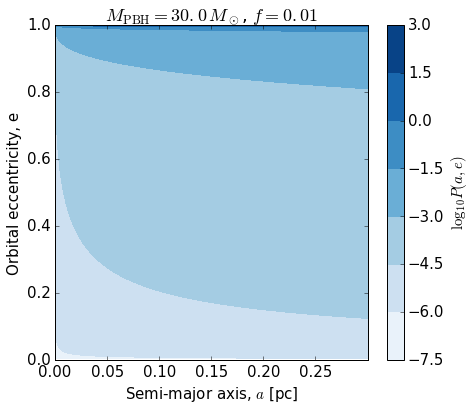

In [77]:
#Let's fix a reference value for f and M_PBH
M_PBH = 30.0
f_ref = 1e-2

#Corresponding maximum value for a:
a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)

#Generate a grid in (a, e)
a_list = np.linspace(0.0, a_max, 201)
e_list = np.linspace(0.0, 0.9999,201)
a_grid, e_grid = np.meshgrid(a_list, e_list, indexing='xy')


pl.figure(figsize=(7,6))

#Plotted filled contours of log10 of PDF of a, e
P_ae_vec = np.vectorize(P_ae, excluded=(2,3))
pl.contourf(a_grid, e_grid, np.log10(P_ae_vec(a_grid, e_grid, f_ref, M_PBH)), cmap="Blues")
pl.colorbar(label=r"$\log_{10}P(a, e)$")

#Plot the maximum value of the eccentricity
pl.plot(a_list, emax(a_list, f_ref, M_PBH), 'k-', lw=2.0)

#Add some labels
pl.xlabel("Semi-major axis, $a$ [pc]")
pl.ylabel("Orbital eccentricity, e")
pl.title(r"$M_\mathrm{PBH} = " + str(M_PBH) + "\,M_\odot$, $f = " + str(f_ref) + "$")

pl.xlim(0, a_max)

pl.savefig("../plots/PDF_axis_eccentricity.pdf", bbox_inches="tight")
pl.show()

### PeriBH as a function of semi-major axis and eccentricity

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


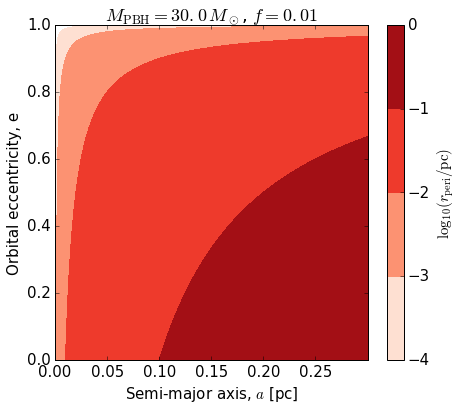

In [71]:
#Let's fix a reference value for f and M_PBH
M_PBH = 30.0
f_ref = 1e-2

#Corresponding maximum value for a:
a_max = (f_ref**(1.0/3.0))*xbar(f_ref, M_PBH)

#Generate a grid in (a, e)
a_list = np.linspace(0, a_max, 201)
e_list = np.linspace(0, 0.999,201)
a_grid, e_grid = np.meshgrid(a_list, e_list, indexing='xy')

pl.figure(figsize=(7,6))

#Plotted filled contours of log10 of periBH (divided by a)
periBH_vec = np.vectorize(periBH)
pl.contourf(a_grid, e_grid, np.log10(periBH_vec(a_grid, e_grid,f_ref, M_PBH)), levels=[-4,-3,-2,-1,0], cmap="Reds")
pl.colorbar(label=r"$\log_{10}(r_\mathrm{peri}/\mathrm{pc})$")

#Plot the maximum value of the eccentricity
pl.plot(a_list, emax(a_list, f_ref, M_PBH), 'k-', lw=2.0)

#Add some labels
pl.xlabel("Semi-major axis, $a$ [pc]")
pl.ylabel("Orbital eccentricity, e")
pl.title(r"$M_\mathrm{PBH} = " + str(M_PBH) + "\,M_\odot$, $f = " + str(f_ref) + "$")

pl.xlim(0, a_max)

pl.savefig("../plots/periBH_map.pdf", bbox_inches="tight")
pl.show()

### Changing variables

Check parameter ranges (for changing the order of integration). First, shade in blue the range of allowed $r$ values for a given $a$:

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


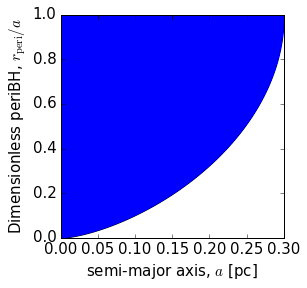

In [72]:
a_list = np.linspace(0.0, 1.0,1001)
r_list = 1- emax(a_list, 1.0)

pl.figure(figsize=(4,4))

pl.plot(a_list, r_list)
pl.fill_between(a_list, r_list, 1.0)

pl.xlabel(r"semi-major axis, $a$ [pc]")
pl.ylabel(r"Dimensionless periBH, $r_\mathrm{peri}/a$")

pl.show()

Now plot the same thing, but the allowed $a$ values as a function of $r$:

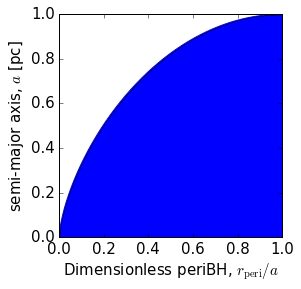

In [73]:
r_list = np.linspace(0.0, 1.0,1001)
a_list = (1.0-(1.0-r_list)**2.0)**(2.0/3.0)

pl.figure(figsize=(4,4))

pl.plot(r_list, a_list)
pl.fill_between(r_list, 0.0,a_list)

pl.ylabel(r"semi-major axis, $a$ [pc]")
pl.xlabel(r"Dimensionless periBH, $r_\mathrm{peri}/a$")

pl.show()

### Probability distribution of periBH

In [74]:
def P_r(r):
    return 0.5*(1-r)*(2*r - r**2)**-0.5

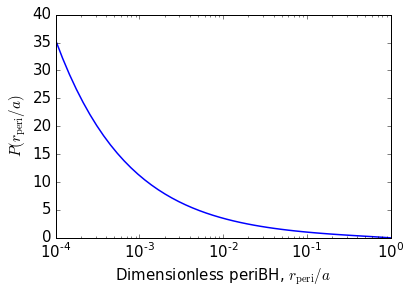

Distribution is normalised to:  0.5


In [76]:
pl.figure()

r_list = np.logspace(-4, 0)
pl.semilogx(r_list, P_r(r_list), linewidth=1.5)

pl.ylabel(r"$P(r_\mathrm{peri}/a)$")
pl.xlabel(r"Dimensionless periBH, $r_\mathrm{peri}/a$")

pl.savefig("../plots/PDF_periBH.pdf", bbox_inches="tight")
pl.show()

#Check the normalisation
print "Distribution is normalised to: ", quad(P_r, 0, 1)[0]